<img src="../logo.png",width=200,height=60>


In [9]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('machine_learning_andrewng/ex2data1.csv', header=None)
df.rename(columns={0: 'exam1', 1: 'exam2', 2: 'y'}, inplace=True)
df.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


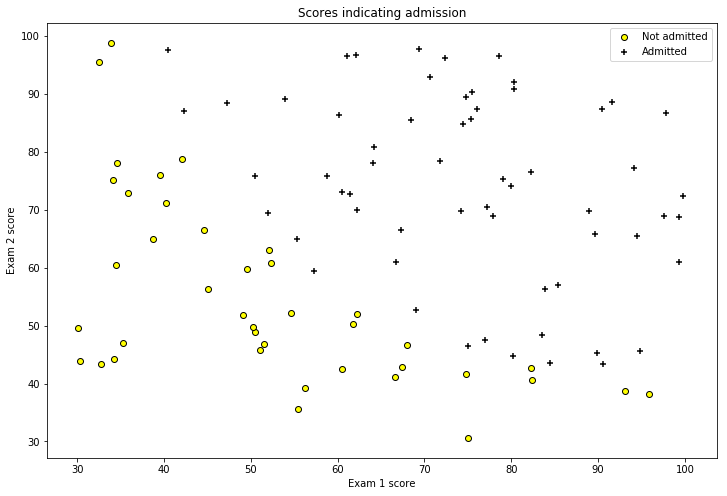

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['exam1'], df[df['y'] == 0]['exam2'],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['exam1'], df[df['y'] == 1]['exam2'],
            label='Admitted', marker='+', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

In [11]:
class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000):
        self.X = self._hstack_one(X)
        self.y = y
        self.thetas = np.zeros((self.X.shape[1]))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:4f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack(
                (np.ones((input_matrix.shape[0], 1)), input_matrix))

    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(-X))

    def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) \
               * (np.sum(np.log(self.sigmoid(dot_prod_pos))) 
                  + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
        return cost

    def predict(self, new_X, threshold=0.5):
        assert new_X.shape[0] != self.X.shape[1], \
            "Number of features don't match. {0} != {1}"\
                .format(new_X.shape[1], self.X.shape[1])
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        return self.sigmoid(h) >= threshold

    def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        return h

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("\rIteration: {0} Loss: {1:.5f}".format(i + 1, cost) + "")
        print

    def scipy_optimize(self, ):
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient,
                          options={'maxiter': self.n_iterations})
        print(result)
        self.thetas = result.x

In [13]:
lr = LogisticRegression(df[['exam1', 'exam2']].values, df['y'].values, n_iterations=20000, alpha=0.001)
optim_theta = lr.scipy_optimize()
print("Cost after converging: {0:.3f}".format(lr.cost()))

Cost before fitting: 0.693147
      fun: 0.20349770159875014
 hess_inv: array([[ 2.23242194e+01, -1.80811824e-01, -1.92839958e-01],
       [-1.80811824e-01,  1.53480255e-03,  1.49837589e-03],
       [-1.92839958e-01,  1.49837589e-03,  1.73637715e-03]])
      jac: array([-1.21664528e-06, -7.91537338e-05, -8.39771285e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 302
      nit: 72
     njev: 285
   status: 2
  success: False
        x: array([-25.16133034,   0.20623169,   0.20147157])
Cost after converging: 0.203


/home/xenonstack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/home/xenonstack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


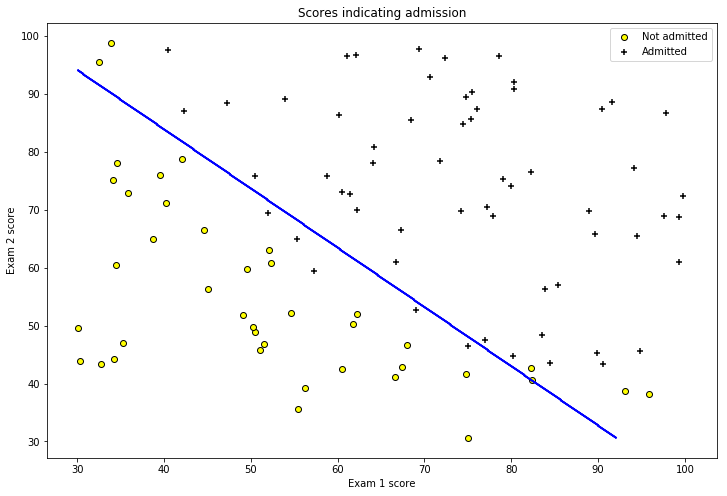

In [14]:
# Plotting the prediction line
col1 = "exam1"
col2 = "exam2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()

min_ex2 = df[col2].min()
max_ex2 = df[col2].max()

arange_step = 0.1

xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                     np.arange(min_ex2, max_ex2, arange_step))
preds = np.c_[xx.ravel(), yy.ravel()]
preds = lr.predict(preds)
preds = preds.reshape(xx.shape)
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
            label='Admitted', marker='+', color='black')
plt.contour(xx, yy, preds, colors='blue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

<p>&copy; 2018 Stacklabs<p>
